# PART- 1

## Predicting diabetes
### Initial Data Exploration

In [1]:
# Setting the work directory
import os
print(os.getcwd())

/home/nbuser


In [2]:
# Load packages and data.
# Packages for data manipulation and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for data modelling. 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

%matplotlib inline

df = pd.read_csv("/home/nbuser/dibates3.csv")

In [3]:
df.head(6) #Displays first 5 columns

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df.tail(5) #Displays last 5 columns

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# We can see that the data frame is made up of numerical data only. 
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check for nulls.
df.apply(lambda x: sum(x.isnull()))

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

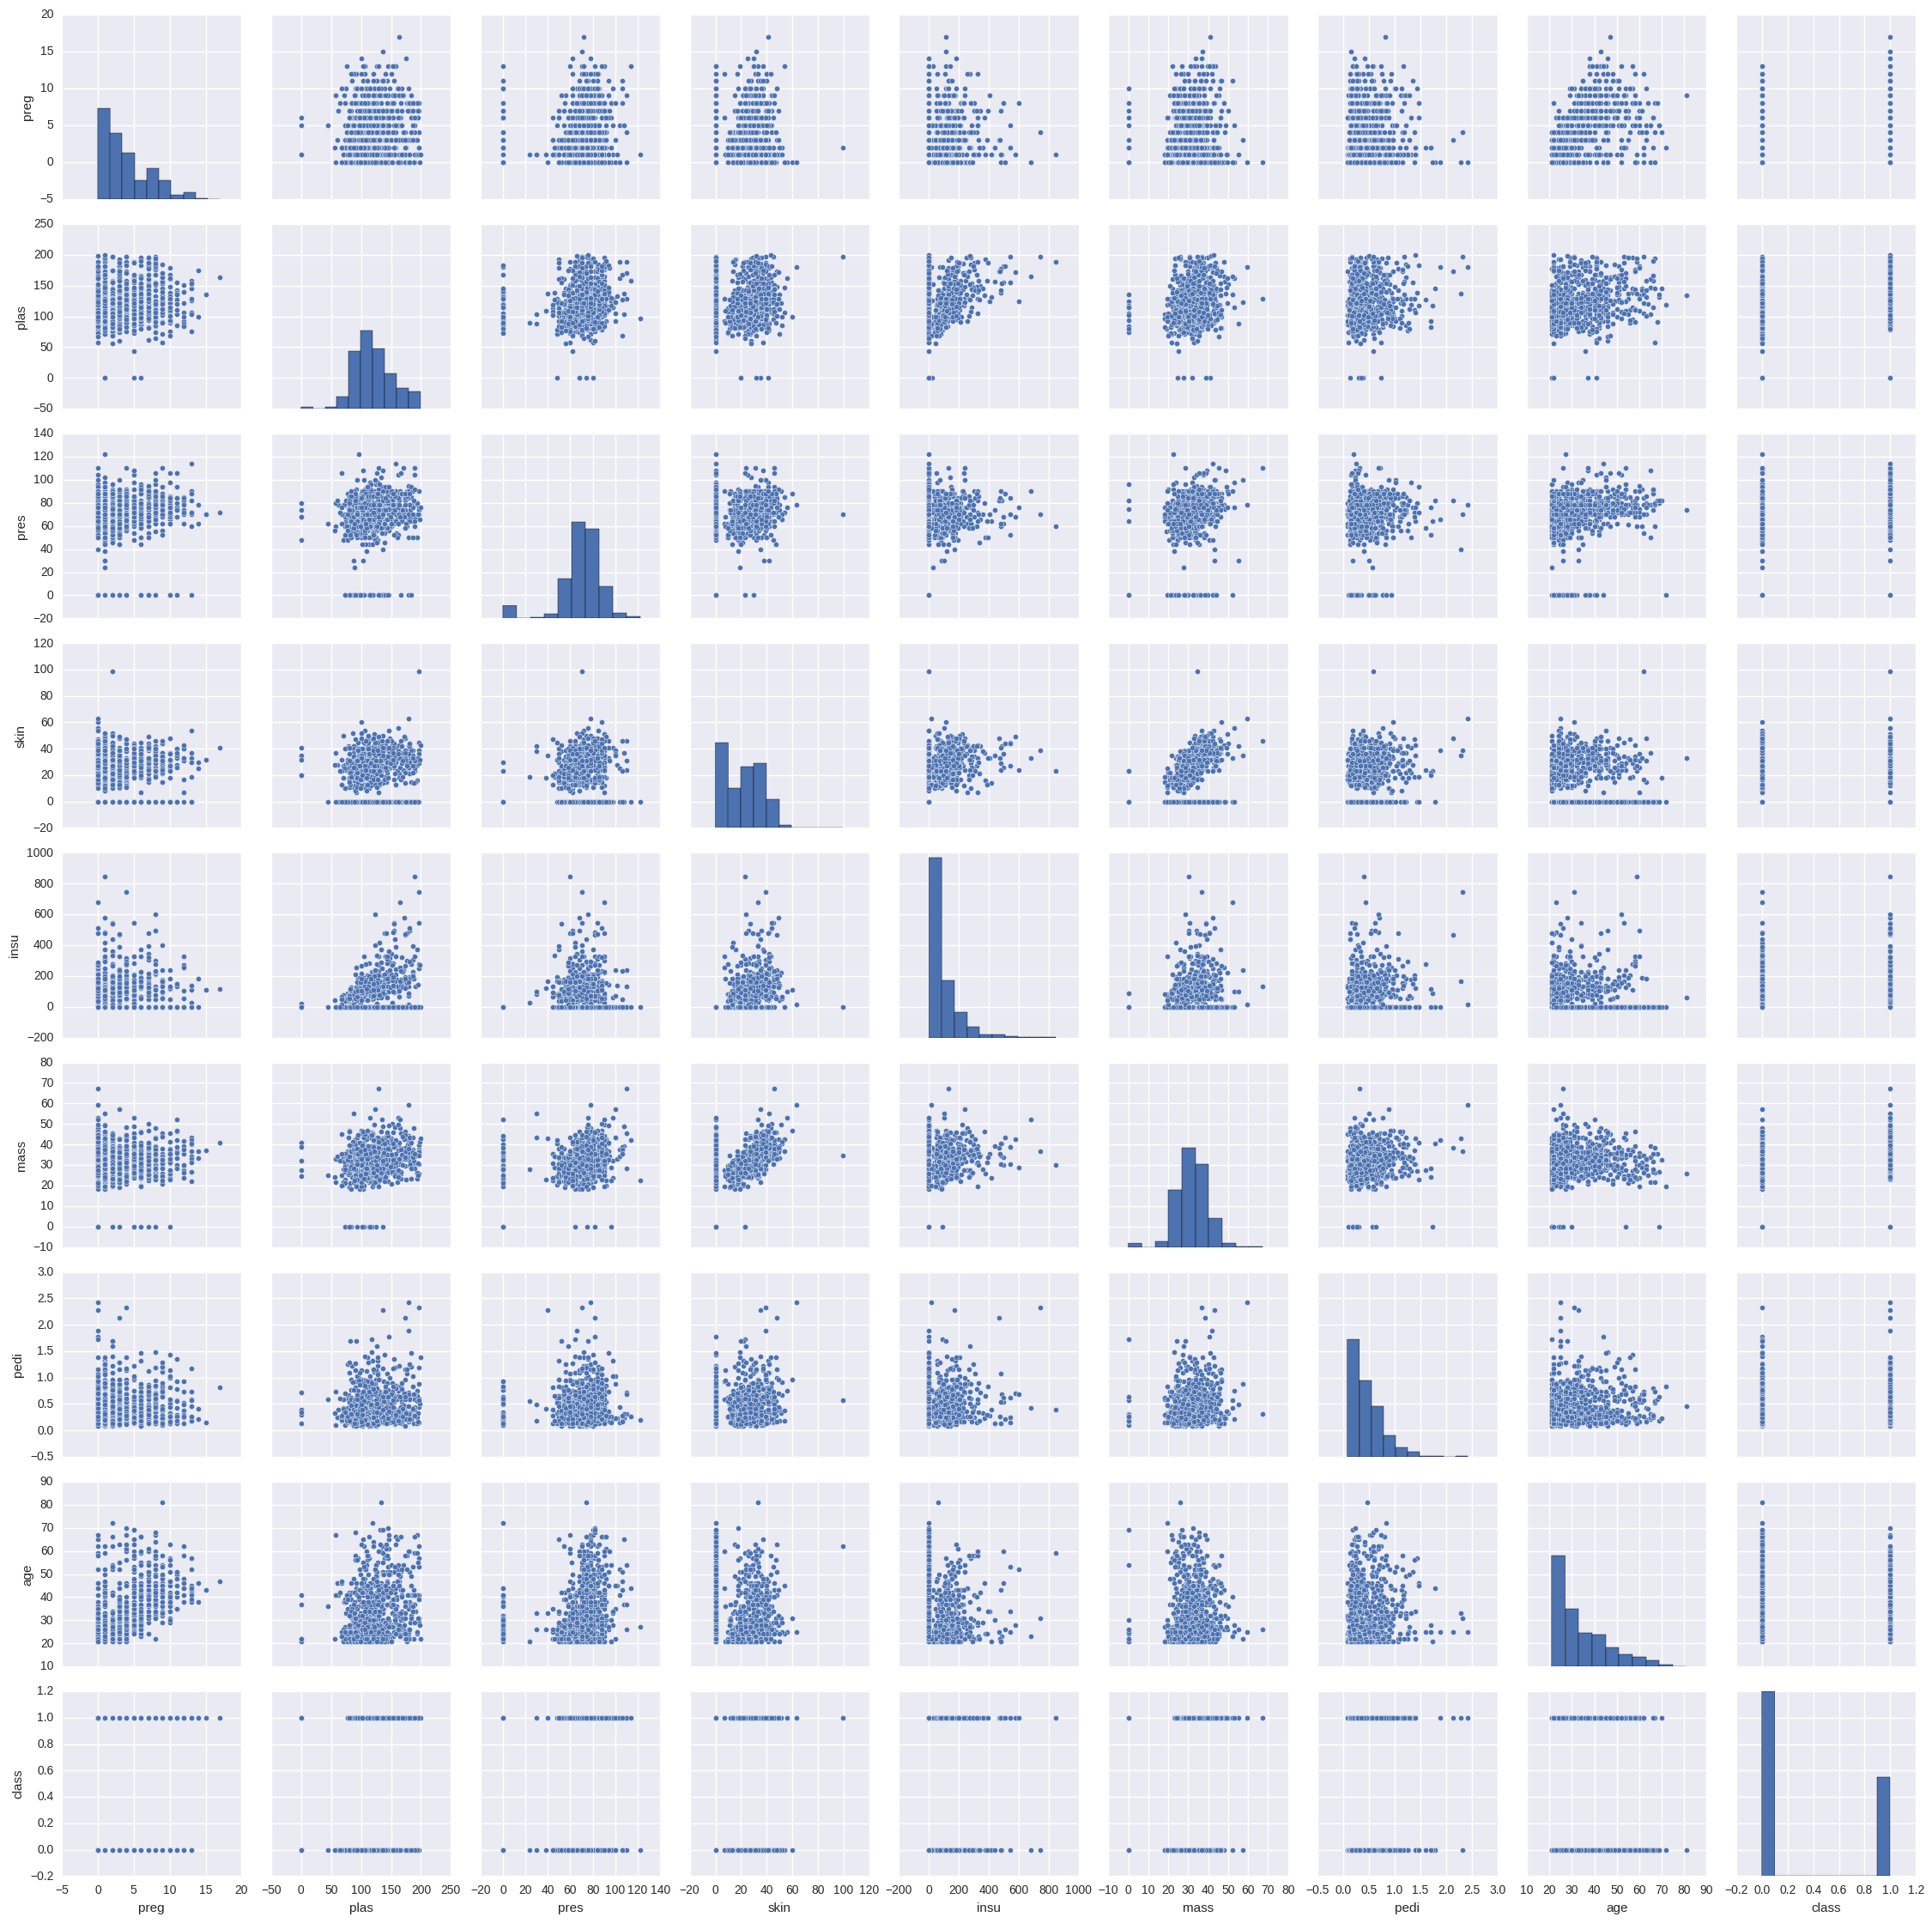

In [8]:
sns.pairplot(df) # Pair-Plot the different variables 

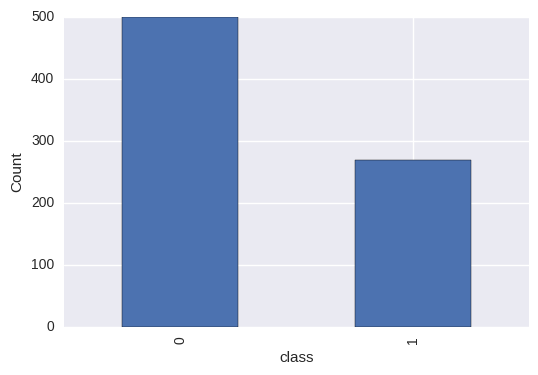

In [9]:

df.groupby('class').size().plot(kind = 'bar')
plt.ylabel('Count')

In [10]:
num_true  = len(df.loc[df['class']  == 1])
num_false = len(df.loc[df['class'] ==  0])
total = float(num_true + num_false)
print("Number of True  cases: {0} ({1:2.2f}%)".format(num_true,  (num_true/total)*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/total)*100))

Number of True  cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Splitting the data, 60% for training and 40% for testing


In [11]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['preg','plas','pres','skin','insu','mass','pedi','age']
predicted_class_names = ['class']

X = df[feature_col_names].values     # predictor feature columns (8 x m ) 
y = df[predicted_class_names].values  # predicted class (1 = true, 0 = false) column (1 x m)
split_test_size = 0.40


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [12]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

59.90% in training set
40.10% in test set


# Data Cleaning
##  Rows with unexpected 0 value

In [13]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing plasma_conc: {0}".format(len(df.loc[df['plas'] == 0])))
print("# rows missing bp: {0}".format(len(df.loc[df['plas'] == 0])))
print("# rows missing skin_ thickness: {0}".format(len(df.loc[df['skin'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insu'] == 0])))
print("# rows missing mass: {0}".format(len(df.loc[df['mass'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['pedi'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing plasma_conc: 5
# rows missing bp: 5
# rows missing skin_ thickness: 227
# rows missing insulin: 374
# rows missing mass: 11
# rows missing diab_pred: 0
# rows missing age: 0


## Impute missing data

In [14]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings

fill_0 = Imputer(missing_values= 0, strategy = "mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# LogisticRegressionCV Classifier


In [15]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=True,class_weight="balanced")
lr_cv_model.fit(X_train,y_train)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [16]:
from sklearn import metrics
lr_cv_predict_test = lr_cv_model.predict(X_test)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print(" ")
print("Confusion Matrix")
# Note the use of labels for 1 = true and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(y_test,lr_cv_predict_test, labels=[1,0])))
# Classification report
print("")
print("Classification Report")
print("")

print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7338
 
Confusion Matrix
[[ 71  31]
 [ 51 155]]

Classification Report

             precision    recall  f1-score   support

          1       0.58      0.70      0.63       102
          0       0.83      0.75      0.79       206

avg / total       0.75      0.73      0.74       308



# Random Forest Classifier

In [17]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
# Performance on Training Data
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))

Accuracy: 0.9717


In [19]:
# Performance on Testing Data
rf_predict_test = rf_model.predict(X_test)
# test metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy: 0.7435


In [20]:
# import the performance metrics library

from sklearn import metrics 
print("Confusion Matrix")
# Note the use of labels for 1 = true and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))# Classification report
print("")
print("Classification Report")
print("")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 63  39]
 [ 40 166]]

Classification Report

             precision    recall  f1-score   support

          1       0.61      0.62      0.61       102
          0       0.81      0.81      0.81       206

avg / total       0.74      0.74      0.74       308



# Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Bayes model object and train it with the 

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [22]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)
# import the performance metrics library

from sklearn import metrics 

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print()

Accuracy: 0.7597



In [23]:
print("Confusion Matrix")
# Note the use of labels for 1 = true and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test, labels=[1,0])))
# Classification report
print("")
print("Classification Report")
print("")

print(metrics.classification_report(y_test,nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 68  34]
 [ 40 166]]

Classification Report

             precision    recall  f1-score   support

          1       0.63      0.67      0.65       102
          0       0.83      0.81      0.82       206

avg / total       0.76      0.76      0.76       308



# Support Vector Machine Classifier

In [24]:
from sklearn import svm 
svm_clf = svm.SVC(C=1.0,degree=3, gamma= 0.005, kernel='rbf',
    max_iter=-1, random_state=None, probability=True)
svm_clf.fit(X_train, y_train)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svm_clf_predict_test = svm_clf.predict(X_test)
# import the performance metrics library

from sklearn import metrics 

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,svm_clf_predict_test)))
print()

Accuracy: 0.7305



In [26]:
# import the performance metrics library
from sklearn import metrics 
print("Confusion Matrix")
# Note the use of labels for 1 = true and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(y_test, svm_clf_predict_test, labels=[1,0])))# Classification report
print("")
print("Classification Report")
print("")
print(metrics.classification_report(y_test, svm_clf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 35  67]
 [ 16 190]]

Classification Report

             precision    recall  f1-score   support

          1       0.69      0.34      0.46       102
          0       0.74      0.92      0.82       206

avg / total       0.72      0.73      0.70       308



In [27]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=2)
# fitting the model
knn_model.fit(X_train, y_train)
# predict the response
pred = knn_model.predict(X_test)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [28]:
knn_model_predict_test = knn_model.predict(X_test)
# import the performance metrics library
from sklearn import metrics 
# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,knn_model_predict_test)))
print()

Accuracy: 0.7240



In [29]:
# import the performance metrics library
from sklearn import metrics 
print("Confusion Matrix")
# Note the use of labels for 1 = true and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(y_test, knn_model_predict_test, labels=[1,0])))# Classification report
print("")
print("Classification Report")
print("")
print(metrics.classification_report(y_test, knn_model_predict_test, labels=[1,0]))

Confusion Matrix
[[ 36  66]
 [ 19 187]]

Classification Report

             precision    recall  f1-score   support

          1       0.65      0.35      0.46       102
          0       0.74      0.91      0.81       206

avg / total       0.71      0.72      0.70       308



# PART -2
## Performance Matrix

In [32]:
threshold = .5

auc for Random Forest Classifier 0.795854749667
auc for K Nearest Neighbour Classifier 0.732962116886
auc for Logistic Regression Classifier 0.825052351038
auc for Support Vector Classifier 0.777055968018
auc for Naive Bayes Classifier 0.818008756901


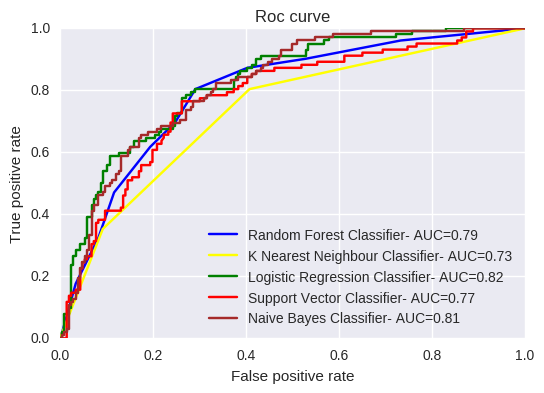

In [38]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

rf_proba  = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_proba)
rf_auc=metrics.auc(rf_fpr, rf_tpr)
print ("auc for Random Forest Classifier",rf_auc)

knn_proba = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_proba)
knn_auc=metrics.auc(knn_fpr, knn_tpr)
print("auc for K Nearest Neighbour Classifier",knn_auc)

lr_proba  = lr_cv_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_proba)
lr_auc=metrics.auc(lr_fpr, lr_tpr)
print("auc for Logistic Regression Classifier",lr_auc)

svm_proba = svm_clf.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_proba)
svm_auc=metrics.auc(svm_fpr, svm_tpr)
print("auc for Support Vector Classifier",svm_auc)

nb_proba = nb_model.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_proba)
nb_auc=metrics.auc(nb_fpr, nb_tpr)
print("auc for Naive Bayes Classifier",nb_auc)


# ploting the roc curve
plt.plot(rf_fpr, rf_tpr, label = "Random Forest Classifier- AUC=0.79", color = 'blue')
plt.plot(knn_fpr, knn_tpr, label = "K Nearest Neighbour Classifier- AUC=0.73", color = 'yellow')
plt.plot(lr_fpr, lr_tpr, label = "Logistic Regression Classifier- AUC=0.82", color = 'green')
plt.plot(svm_fpr, svm_tpr,label = "Support Vector Classifier- AUC=0.77", color = 'red')
plt.plot(nb_fpr, nb_tpr, label = "Naive Bayes Classifier- AUC=0.81", color = 'brown')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()